In [1]:
import numpy as np
import matplotlib.pyplot as plt

from colorsys import rgb_to_hsv
from numpy.fft import ifft2

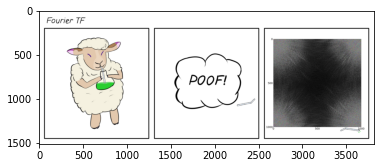

In [2]:
image = plt.imread("./fouriertf.png")
plt.imshow(image);

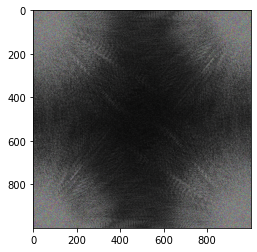

In [3]:
origin=(320,2674)
size=1000
crop = image[origin[0]:origin[0]+size, origin[1]:origin[1]+size]
plt.imshow(crop);

In [4]:
def rgb_to_cpx(array):
    phi_norm, _, mod = np.vectorize(rgb_to_hsv)(array[:,:,0], array[:,:,1], array[:,:,2])
    return mod * np.exp(1j * phi_norm * 2 * np.pi)

def rgb_fft_to_image(rgb_fft):
    recovered_cpx_fft = rgb_to_cpx(rgb_fft)
    recovered_image = np.abs(ifft2(recovered_cpx_fft))
    return recovered_image

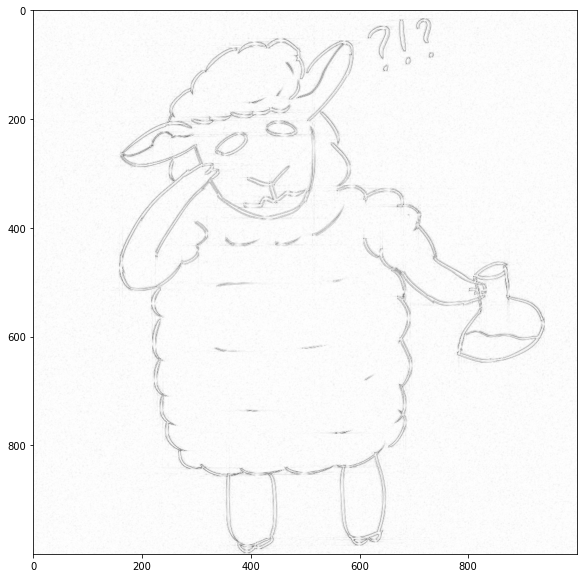

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(rgb_fft_to_image(crop), cmap="binary");

Side note: to make the FFT plot visually interesting I had to clip the higher amplitudes of the FFT before plotting it. Otherwise, the low frequencies would push most of the plot toward a black color. But because of that clipping, the low frequency information is lost, hence the strange edge-detection-like look of the output.